# Week 8 Homework

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [3]:
import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

## Exercise 12-1
The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [5]:
# Get the data
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/mj-clean.csv")
transactions = pd.read_csv("mj-clean.csv", parse_dates=[5])
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [6]:
# Define the function to get the daily average data as well as year column
def GroupByDay(transactions, func=np.mean):
    grouped = transactions[["date", "ppg"]].groupby("date")
    daily = grouped.aggregate(func)

    daily["date"] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, "Y")
    daily["years"] = (daily.date - start) / one_year

    return daily

In [7]:
# Define the function to group by quality name for daily averages
def GroupByQualityAndDay(transactions):
    groups = transactions.groupby("quality")
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)

    return dailies

In [8]:
# Get the daily average data by quality
dailies = GroupByQualityAndDay(transactions)
dailies['high'].sample(5)

,ppg,date,years
date,,,
2012-11-17,11.948315,2012-11-17,2.210959
2011-07-31,13.020417,2011-07-31,0.909589
2011-07-03,13.758333,2011-07-03,0.832877
2011-04-06,12.886667,2011-04-06,0.591781
2010-11-16,14.231364,2010-11-16,0.205479


In [9]:
# Use a quadratic model to fit the time series of daily prices
import statsmodels.formula.api as smf

def RunQuadraticModel(daily):
    daily['years2'] = daily.years**2
    model = smf.ols('ppg ~ years + years2', data = daily)
    results = model.fit()
    return model, results

from IPython.display import display

for name, daily in dailies.items():
    model, results = RunQuadraticModel(daily)
    print(name)
    print('*' * 30)
    display(results.summary())
    print('*' * 30)

high
******************************


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          4.57e-164
Time:                        23:34:43   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1164      0.084    -13.326      0.000      -1.281      -0.952
years2         0.1131      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

******************************
low
******************************


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     22.86
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           1.83e-10
Time:                        23:34:43   Log-Likelihood:                -3086.5
No. Observations:                1179   AIC:                             6179.
Df Residuals:                    1176   BIC:                             6194.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7050      0.287     16.393      0.000       4.142       5.268
years          1.6318      0.357      4.573      0.000       0.932       2.332
years2        -0.2933      0.095     -3.091      0.002      -0.479      -0.107
==============================================================================
Omnibus:                      661.159   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6718.787
Skew:                           2.415   Prob(JB):                         0.00
Kurtosis:                      13.651   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

******************************
medium
******************************


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     57.33
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           1.55e-24
Time:                        23:34:43   Log-Likelihood:                -2030.6
No. Observations:                1238   AIC:                             4067.
Df Residuals:                    1235   BIC:                             4083.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3509      0.104     80.512      0.000       8.147       8.554
years          1.1464      0.130      8.806      0.000       0.891       1.402
years2        -0.2383      0.035     -6.878      0.000      -0.306      -0.170
==============================================================================
Omnibus:                      194.417   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.295
Skew:                           0.585   Prob(JB):                    1.20e-244
Kurtosis:                       7.517   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

******************************


In [10]:
# Define functions to resample, generate predictions with the option to add resampled residuals, generate sequence of models based on different amount 
# of past data
def SimulateResults(daily, iters=101, func=RunQuadraticModel):
    _, results = func(daily)
    fake = daily.copy()

    result_seq = []
    for _ in range(iters):
        fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
        _, fake_results = func(fake)
        result_seq.append(fake_results)

    return result_seq

def GeneratePredictions(result_seq, years, add_resid=False):
    n = len(years)
    d = dict(Intercept=np.ones(n), years=years, years2=years**2)
    predict_df = pd.DataFrame(d)

    predict_seq = []
    for fake_results in result_seq:
        predict = fake_results.predict(predict_df)
        if add_resid:
            predict += thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)

    return predict_seq

def SimulateIntervals(daily, iters=101, func=RunQuadraticModel):
    result_seq = []
    starts = np.linspace(0, len(daily), iters).astype(int)

    for start in starts[:-2]:
        subset = daily[start:]
        _, results = func(subset)
        fake = subset.copy()

        for _ in range(iters):
            fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
            _, fake_results = func(fake)
            result_seq.append(fake_results)

    return result_seq

In [11]:
# Define proper plot function
def plot(daily, years, iters=101, percent=90, func=RunQuadraticModel, plot_interval = True):
    """Plots predictions of all input years and predictions based on different intervals.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq_resample = SimulateResults(daily, iters=iters, func=func)
    result_seq_interval = SimulateIntervals(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100 - p

    predict_seq = GeneratePredictions(result_seq_resample, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color="gray")

    predict_seq = GeneratePredictions(result_seq_resample, years, add_resid=False)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.5, color="gray")

    if plot_interval:
        result_seq_interval = SimulateIntervals(daily, iters=iters, func=func)
        predict_seq = GeneratePredictions(result_seq_interval, years, add_resid=True)
        low, high = thinkstats2.PercentileRows(predict_seq, percents)
        thinkplot.FillBetween(years, low, high, alpha=0.2, color="gray")

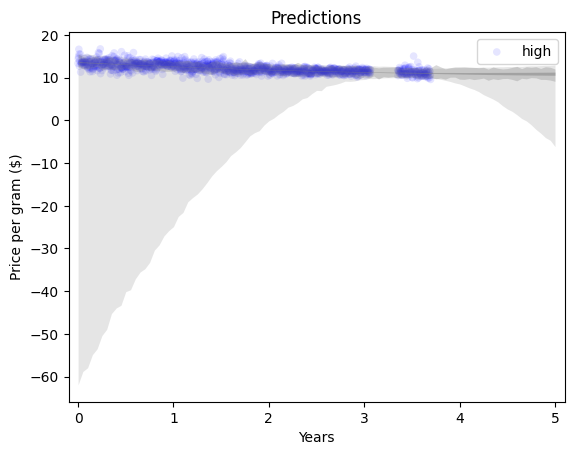

In [12]:
# Plot the predictions for the next 5 years price of the high quality weed and include the intervals
import warnings
warnings.filterwarnings('ignore')

name = 'high'
daily = dailies[name]
years = np.linspace(0, 5, 101)

thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
plot(daily, years, plot_interval=True)
xlim = years[0] - 0.1, years[-1] + 0.1
thinkplot.Config(
    title="Predictions", xlabel="Years", xlim=xlim, ylabel="Price per gram ($)"
)

Including the intervals hinders the visualization analysis of the prediction. Let's try taking it out of the parameters.

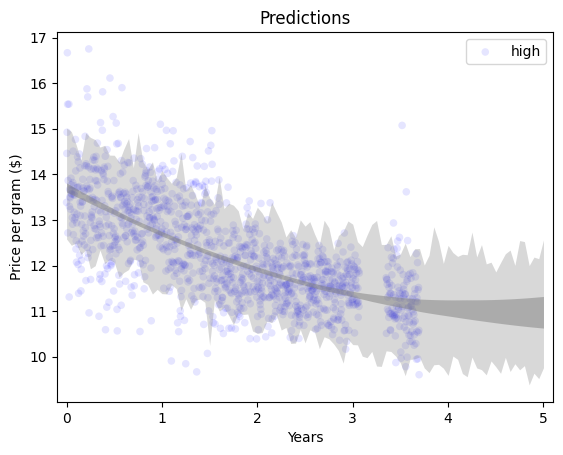

In [13]:
# Plot the predictions for the next 5 years price of the high quality weed and exclude the intervals
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
plot(daily, years, plot_interval=False)
xlim = years[0] - 0.1, years[-1] + 0.1
thinkplot.Config(
    title="Predictions", xlabel="Years", xlim=xlim, ylabel="Price per gram ($)"
)

As the plot suggest, the prediction of the price over the next five years from the weed sale dataset is that it's going downward with a decreasing rate.

## Exercise 12-2 
Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [15]:
# Create the SerialCorrelationTest class that inherits the HypothesisTest class with the essential methods. I will also include the Linear Model
# Defintiion in the class as well
class SerialCorrelationTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        series, lag = data
        test_stat = thinkstats2.Corr(series, lag)
        return test_stat

    def RunModel(self):
        series, lag = self.data
        series = np.random.permutation(series)
        return series, lag

    def RunLinearModel(self, daily):
        model = smf.ols("ppg ~ years + years2", data=daily)
        results = model.fit()
        return model, results

In [16]:
# Test whether the serial correlation in raw price data is statistically significant, using lag of 1
series = daily.ppg[1:]
lag = daily.ppg.shift(1)[1:]

data = series, lag
ht = SerialCorrelationTest(data)
pvalue = ht.PValue()
pvalue

0.0

Because the the p value is less than 0.05. It's statistically significant.

In [18]:
# Test the residuals of the linear model
model_lnr, results_lnr = ht.RunLinearModel(daily)

series = results_lnr.resid[1:]
lag = results_lnr.resid.shift(1)[1:]

data = series, lag
ht = SerialCorrelationTest(data)
pvalue = ht.PValue()
pvalue

0.035

Because the p value is less then 0.05, it's statistically significant.

In [20]:
# Test the residuals of the quadratic model
model_qua, results_qua = RunQuadraticModel(daily)

series = results_qua.resid[1:]
lag = results_qua.resid.shift(1)[1:]

data = series, lag
ht = SerialCorrelationTest(data)
pvalue = ht.PValue()
pvalue

0.024

Again, the p value is less then 0.05. It's statistically significant.